In [1]:
import functions as f
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import graphviz

# Read Data

In [2]:
credit_data = f.read_csv('Assignment/credit-data.csv')

# Explore Data

In [3]:
credit_data.columns

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [4]:
f.review_df(credit_data)

Number of rows:   41016
Number of columns:   13
Total observations:   533208


In [5]:
credit_data.head(10)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0
5,99033,0,0.142231,57,60601,0,0.015332,13500.0,6,0,0,0,0.0
6,99044,0,0.047601,48,60601,0,0.474609,3583.0,13,0,1,0,1.0
7,99048,0,0.022141,34,60601,0,0.003332,2700.0,2,0,0,0,1.0
8,99056,0,0.241805,30,60601,0,0.864452,3400.0,13,0,1,0,1.0
9,99058,0,0.036181,71,60601,0,0.568798,5050.0,16,0,2,0,0.0


### Mean lineplots

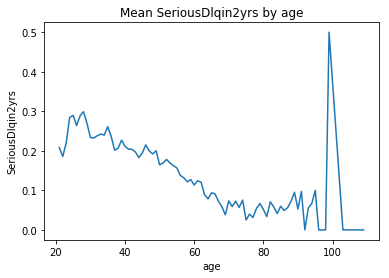

In [6]:
f.mean_Y_by_X(credit_data, 'age', 'SeriousDlqin2yrs')

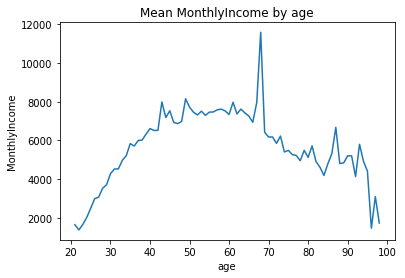

In [7]:
f.mean_Y_by_X(credit_data, 'age', 'MonthlyIncome')

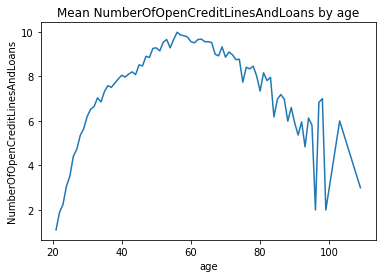

In [8]:
f.mean_Y_by_X(credit_data, 'age', 'NumberOfOpenCreditLinesAndLoans')

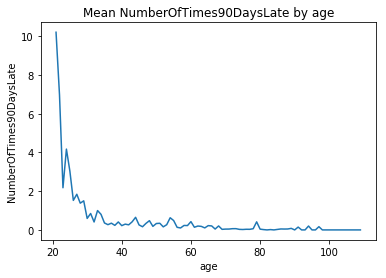

In [9]:
f.mean_Y_by_X(credit_data, 'age', 'NumberOfTimes90DaysLate')

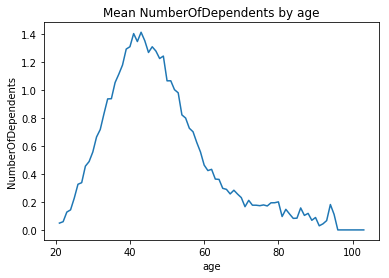

In [10]:
f.mean_Y_by_X(credit_data, 'age', 'NumberOfDependents')

### Correlation Heatmap

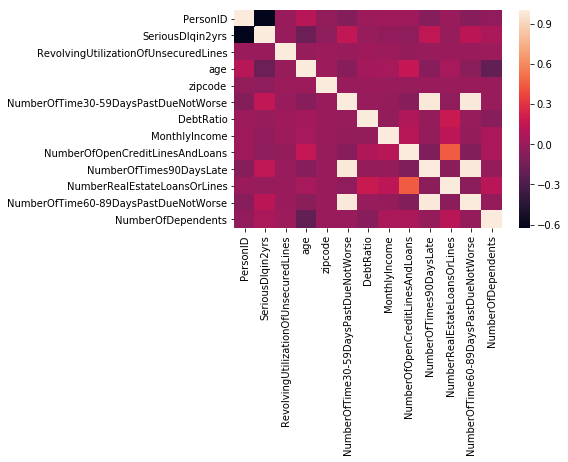

In [11]:
%matplotlib inline
f.correlation_heatmap(credit_data)

### Columns missing values and count NaN

In [12]:
f.has_na(credit_data)

[('MonthlyIncome', 7974), ('NumberOfDependents', 1037)]

# Pre-process Data

In [13]:
# Replace NaN with mean of column
copy = credit_data
cd_replace = f.replace_missing_with_mean(copy)

# Generate Features/Predictors

In [14]:
cd_replace['Senior Citizen'] = cd_replace['age'].apply(lambda x: 65 < x)

In [15]:
cd_replace.groupby('Senior Citizen').count()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Senior Citizen,,,,,,,,,,,,,
False,33657,33657,33657,33657,33657,33657,33657,33657,33657,33657,33657,33657,33657
True,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359,7359


In [16]:
den = cd_replace.groupby('Senior Citizen').count()['PersonID'][0]
num = cd_replace.groupby('Senior Citizen').count()['PersonID'][1]

percent_seniors = num/den
percent_seniors

0.21864693822978876

In [17]:
cd_replace['In Poverty'] = cd_replace['MonthlyIncome'].apply(lambda x: (25100/12) > x) 
# $25,100 annually is the federal poverty level for a family of 4

In [18]:
cd_replace.head(10)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Senior Citizen,In Poverty
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0,False,True
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0,True,False
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0,False,False
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0,False,False
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0,False,False
5,99033,0,0.142231,57,60601,0,0.015332,13500.0,6,0,0,0,0.0,False,False
6,99044,0,0.047601,48,60601,0,0.474609,3583.0,13,0,1,0,1.0,False,False
7,99048,0,0.022141,34,60601,0,0.003332,2700.0,2,0,0,0,1.0,False,False
8,99056,0,0.241805,30,60601,0,0.864452,3400.0,13,0,1,0,1.0,False,False
9,99058,0,0.036181,71,60601,0,0.568798,5050.0,16,0,2,0,0.0,True,False


In [19]:
r1, c1 = cd_replace[(cd_replace['Senior Citizen']==True) & (cd_replace['In Poverty']==True)].shape

In [20]:
r2, c2 = cd_replace[cd_replace['Senior Citizen']==True].shape

In [21]:
# Percentage of senior citizens who are in poverty
r1/r2

0.08588123386329664

### Discretize MonthlyIncome

In [22]:
discretized = f.discretize(cd_replace, 'MonthlyIncome')

In [23]:
discretized.head(30)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Senior Citizen,In Poverty,MonthlyIncome - Discretized
0,98976,0,1.000000,55,60601,0,505.000000,0.000000,2,0,0,0,0.0,False,True,"(-1794.06, 3588.12]"
1,98991,0,0.547745,71,60601,0,0.459565,15666.000000,7,0,2,0,0.0,True,False,"(14352.48, 17940.6]"
2,99012,0,0.044280,51,60601,0,0.014520,4200.000000,5,0,0,0,0.0,False,False,"(3588.12, 7176.24]"
3,99023,0,0.914249,55,60601,4,0.794875,9052.000000,12,0,3,0,0.0,False,False,"(7176.24, 10764.36]"
4,99027,0,0.026599,45,60601,0,0.049966,10406.000000,4,0,0,0,2.0,False,False,"(7176.24, 10764.36]"
5,99033,0,0.142231,57,60601,0,0.015332,13500.000000,6,0,0,0,0.0,False,False,"(10764.36, 14352.48]"
6,99044,0,0.047601,48,60601,0,0.474609,3583.000000,13,0,1,0,1.0,False,False,"(-1794.06, 3588.12]"
7,99048,0,0.022141,34,60601,0,0.003332,2700.000000,2,0,0,0,1.0,False,False,"(-1794.06, 3588.12]"
8,99056,0,0.241805,30,60601,0,0.864452,3400.000000,13,0,1,0,1.0,False,False,"(-1794.06, 3588.12]"
9,99058,0,0.036181,71,60601,0,0.568798,5050.000000,16,0,2,0,0.0,True,False,"(3588.12, 7176.24]"


# Build & Evaluate Classifier

In [24]:
cd_replace.columns

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'Senior Citizen', 'In Poverty', 'MonthlyIncome - Discretized'],
      dtype='object')

In [25]:
var = 'SeriousDlqin2yrs'
test_size = 0.3
x_train, x_test, y_train, y_test = f.split(cd_replace, var, test_size)

In [26]:
new_df = cd_replace.drop(['Senior Citizen', 'In Poverty', 
                          'MonthlyIncome - Discretized'], axis = 1)

In [27]:
x_train, x_test, y_train, y_test = f.split(new_df, var, test_size)

In [28]:
f.classify_and_evaluate(x_train, x_test, y_train, y_test, n=10)

/Users/akoko0530/Documents/GitHub/CAPP30254_MachineLearning2018/Homework_2/functions.py:164: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  metric_params={'p': 3})


Probability estimates for the test data X:  
[[0.  1. ]
 [0.9 0.1]
 [0.9 0.1]
 ...
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]]
Train score:  
0.9440632510187733
Test score:  
0.9413246647704185


In [29]:
def train_test_split(df, var, t_size):
    X = df
    Y = df[var]
    test_size = t_size
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    return (x_train, x_test, y_train, y_test)
    

In [30]:
f.classify_and_evaluate(x_train, x_test, y_train, y_test, n=1)

Probability estimates for the test data X:  


/Users/akoko0530/Documents/GitHub/CAPP30254_MachineLearning2018/Homework_2/functions.py:164: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  metric_params={'p': 3})


[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Train score:  
1.0
Test score:  
0.8972775294595693


# Write up

After reading the CSV file into a pandas dataframe, I took a look at the column titles and the shape of the dataframe and computed the total number of observations.  As a part of data exploration, I plotted the mean of different variables (SeriousDlqin2yrs, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberOfDependents) against age to look at how the means of those variables change with age.  Generally, SeriousDlqin2yrs was highest for ages 20 to 30, with a spike for observations of those around 100 years old.  MonthlyIncome spiked around 60 to 70 years, matching a dip in SeriousDlqin2yrs.  NumberOfOpenCreditLinesAndLoans showed a similar shape as MonthlyIncome.  While those in their 40s had the highest mean of NumberOfDependents, ages 50 to 60 had the highest NumberOfOpenCreditLinesAndLoans.

Looking at the correlation heatmap, the following categories had a correlation of approx 1 (highly correlated):
- NumberOfTimes90DaysLate and NumberOfTime30-59DaysPastDueNotWorse
- NumberOfTime60-89DaysPastDueNotWorse and NumberOfTime30-59DaysPastDueNotWorse
- NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate

This was useless information returned from the heatmap because if your are 90days late, then you are also 30-59 days past due and 60-89 days past due.

The correlation heat map also showed that NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines had a correlation of approximately 0.55.

I ran the count of missing observations by column name, and if given a threshold it would be possible to determine if those individual observations (the whole row) could be dropped (i.e. what happens when programming in R).  Not knowing what would be considered an acceptable number of rows to drop, I decided to pre-process the data by replacing all missing observations with the mean of that column and assigned the new dataframe the title 'cd_replace'.  I then created two dummy variable columns for whether a person was a Senior Citizen ('Senior Citizen') and if their monthly income was below the federal poverty level ('In Poverty').  I then discretized MonthlyIncome and added it as a new column.

The data was split into train and test dataframes, where train size was 0.7 and test size was 0.3.  I then used a KNN classifier and evaluated the classifier for a training and testing data at different number of neighbors (n).  When n=1, the training data returned an accuracy score of 100%, and a testing accuracy score of approcimately 90%.  When n=10, the training data returned an accuracy score of 94.2% and a slightly higher testing score of 94.5%.  By increasing the number of nearest neighbors, the accuracy score of the testing data increased.




Worked with: Natasha, Saptarshi, Ian